In [1]:
import warnings
import numpy as np
import matplotlib.pyplot as plt
import requests
from PIL import Image
from io import BytesIO

import sys
sys.path.append("./lang-segment-anything")
from lang_sam import LangSAM

In [ ]:
def save_mask(mask_np, filename):
    mask_image = Image.fromarray((mask_np * 255).astype(np.uint8))
    mask_image.save(filename)

def display_image_with_masks(image, masks):
    num_masks = len(masks)

    fig, axes = plt.subplots(1, num_masks + 1, figsize=(15, 5))
    axes[0].imshow(image)
    axes[0].set_title("Original Image")
    axes[0].axis('off')

    for i, mask_np in enumerate(masks):
        axes[i+1].imshow(mask_np, cmap='gray')
        axes[i+1].set_title(f"Mask {i+1}")
        axes[i+1].axis('off')

    plt.tight_layout()
    plt.show()

def display_image_with_boxes(image, boxes, logits):
    fig, ax = plt.subplots()
    ax.imshow(image)
    ax.set_title("Image with Bounding Boxes")
    ax.axis('off')

    for box, logit in zip(boxes, logits):
        x_min, y_min, x_max, y_max = box
        confidence_score = round(logit.item(), 2)  # Convert logit to a scalar before rounding
        box_width = x_max - x_min
        box_height = y_max - y_min

        # Draw bounding box
        rect = plt.Rectangle((x_min, y_min), box_width, box_height, fill=False, edgecolor='red', linewidth=2)
        ax.add_patch(rect)

        # Add confidence score as text
        ax.text(x_min, y_min, f"Confidence: {confidence_score}", fontsize=8, color='red', verticalalignment='top')

    plt.show()

def print_bounding_boxes(boxes):
    print("Bounding Boxes:")
    for i, box in enumerate(boxes):
        print(f"Box {i+1}: {box}")

def print_detected_phrases(phrases):
    print("\nDetected Phrases:")
    for i, phrase in enumerate(phrases):
        print(f"Phrase {i+1}: {phrase}")

def print_logits(logits):
    print("\nConfidence:")
    for i, logit in enumerate(logits):
        print(f"Logit {i+1}: {logit}")

final text_encoder_type: bert-base-uncased


Some weights of the model checkpoint at bert-base-uncased were not used when initializing BertModel: ['cls.seq_relationship.weight', 'cls.predictions.transform.dense.weight', 'cls.predictions.transform.dense.bias', 'cls.predictions.bias', 'cls.predictions.transform.LayerNorm.weight', 'cls.seq_relationship.bias', 'cls.predictions.transform.LayerNorm.bias']
- This IS expected if you are initializing BertModel from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing BertModel from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).


Model loaded from /home/tchiaburu/.cache/huggingface/hub/models--ShilongLiu--GroundingDINO/snapshots/a94c9b567a2a374598f05c584e96798a170c56fb/groundingdino_swinb_cogcoor.pth 
 => _IncompatibleKeys(missing_keys=[], unexpected_keys=['label_enc.weight'])


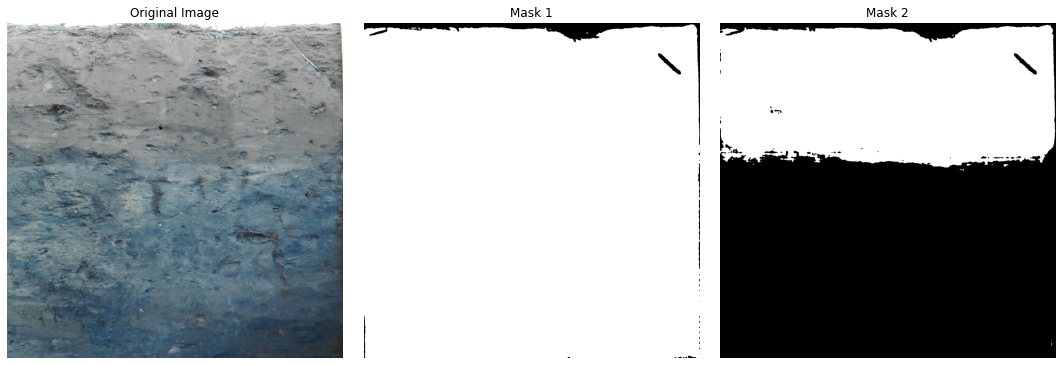

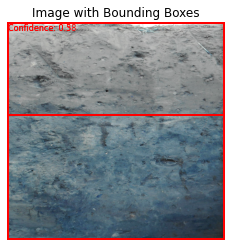

Bounding Boxes:
Box 1: tensor([   2.7139,    5.8566, 1496.9896, 1494.2942])
Box 2: tensor([   1.7955,    4.6872, 1497.0121,  639.5811])

Detected Phrases:
Phrase 1: soil horizons
Phrase 2: soil horizons

Confidence:
Logit 1: 0.5848762392997742
Logit 2: 0.304960697889328


In [5]:
img_name = "image1"
image = f"./BGR/figures/examples_lang_sam/{img_name}.png"
text_prompt = "soil horizons"

try:
    image_pil = Image.open(image).convert("RGB")

    model = LangSAM()
    masks, boxes, phrases, logits = model.predict(image_pil, text_prompt)

    if len(masks) == 0:
        print(f"No objects of the '{text_prompt}' prompt detected in the image.")
    else:
        # Convert masks to numpy arrays
        masks_np = [mask.squeeze().cpu().numpy() for mask in masks]

        # Display the original image and masks side by side
        display_image_with_masks(image_pil, masks_np)

        # Display the image with bounding boxes and confidence scores
        display_image_with_boxes(image_pil, boxes, logits)

        # Save the masks
        for i, mask_np in enumerate(masks_np):
            mask_path = f"./BGR/figures/examples_lang_sam/{img_name}_mask_{i+1}.png"
            save_mask(mask_np, mask_path)

        # Print the bounding boxes, phrases, and logits
        print_bounding_boxes(boxes)
        print_detected_phrases(phrases)
        print_logits(logits)

except (requests.exceptions.RequestException, IOError) as e:
    print(f"Error: {e}")